In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import sys
sys.path.append("..")

In [74]:
import torch
from inpainting.inpainters.mnist import MNISTMisganInpainterInterface
from inpainting.datasets.mnist import train_val_datasets
from pathlib import Path
from inpainting.datasets.utils import RandomRectangleMaskConfig
from inpainting.datasets import mask_coding as mc
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader, TensorDataset
import pickle
from tqdm import tqdm
import numpy as np
from inpainting.visualizations import samples as vis
from inpainting.visualizations.digits import digit_with_mask as vis_digit_mask
import matplotlib.pyplot as plt
from inpainting.utils import predictions_for_entire_loader

In [60]:
device = torch.device("cpu")

In [61]:
inpainter = MNISTMisganInpainterInterface()
chckp = torch.load("/home/mprzewiezlikowski/uj/gmms_inpainting/results/methods_comparison/mnist/misgan/imputer.pth")
inpainter.imputer.load_state_dict(chckp)

<All keys matched successfully>

In [62]:
ds_train, ds_val = train_val_datasets(
    Path.home() / "uj/data/",
    mask_configs=[

        RandomRectangleMaskConfig(mc.UNKNOWN_LOSS, 14, 14, 0,0),
    ],
    ds_type=MNIST
)

In [63]:
batch_size=96
dl_train = DataLoader(ds_train, batch_size, shuffle=True)
dl_val = DataLoader(ds_val, batch_size, shuffle=True)

In [75]:
results = predictions_for_entire_loader(
    inpainter,
    dl_val
)

len(results)

105it [00:03, 26.53it/s]


10000

In [65]:
results_path = Path("../results/mnist/misgan")
results_path.mkdir(parents=True, exist_ok=True)

with (results_path / "val_predictions.pkl").open("wb") as f:
    pickle.dump(results, f)

In [66]:
!ls -l ../results/mnist/misgan

total 218516
-rw-r--r-- 1 mprzewiezlikowski users 223759459 Mar  8 20:22 val_predictions.pkl


In [67]:
[
    t.shape for t in results[0]
]

[(1, 28, 28), (1, 28, 28), (1,), (1, 784), (1, 3, 784), (1, 784), ()]

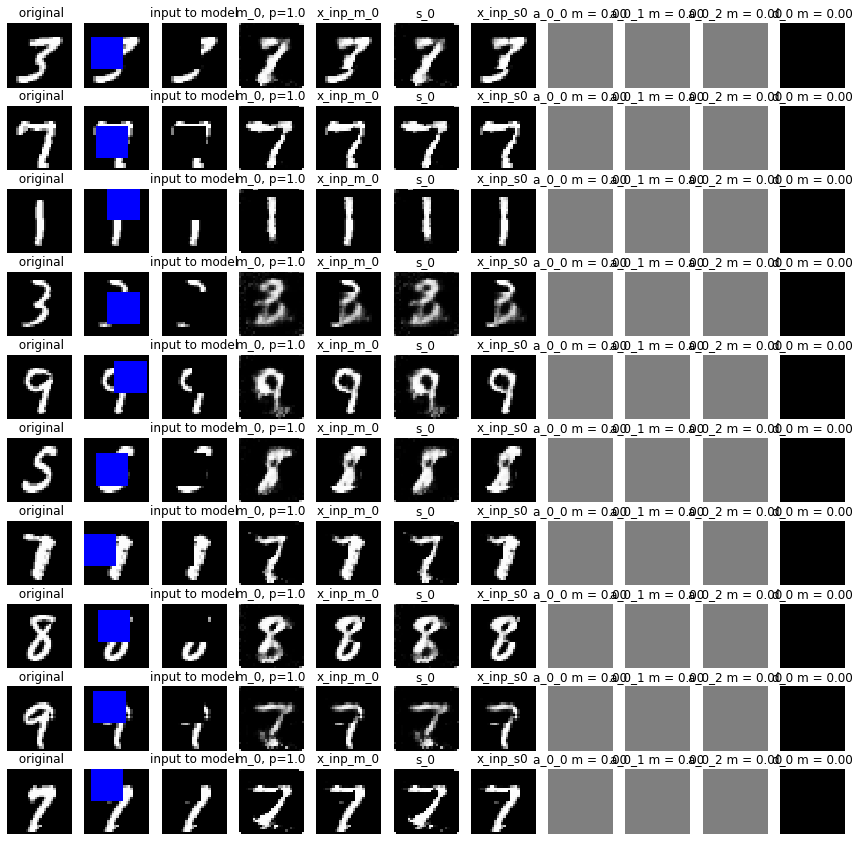

In [73]:
fig, ax = plt.subplots(10, 11, figsize=(15,15)
)

for i in range(10):
    vis.visualize_sample(
        *results[i],
        drawing_fn=vis_digit_mask,
        title_prefixes=dict(),
        ax_row=ax[i]
    )